<h3>Кластеризація. Метод k-mean, пошук оптимальних параметрів</h3>
<h4>Контекст</h4>
<p>HELP International — це міжнародна гуманітарна неурядова організація, яка займається боротьбою з бідністю та наданням людям відсталих країн базових зручностей і допомоги під час стихійних лих і стихійних лих. Час від часу він запускає багато оперативних проектів, а також проводить адвокаційні заходи для підвищення обізнаності, а також для цілей фінансування.</p>
<p>Після останніх програм фінансування їм вдалося зібрати близько 10 мільйонів доларів. Тепер генеральний директор НУО має вирішити, як стратегічно та ефективно використати ці гроші. Важливі проблеми, які виникають під час прийняття цього рішення, здебільшого пов’язані з вибором країн, які найбільше потребують допомоги.</p>
<p>І тут ви виступаєте як аналітик даних. Ваша  робота полягає в тому, щоб класифікувати країни за певними соціально-економічними факторами та факторами охорони здоров’я, які визначають загальний розвиток країни. Потім вам потрібно запропонувати країни, на яких генеральний директор має зосередитися найбільше.</p>
<p>Проаналізуйте кластери та визначте ті, які гостро потребують допомоги. Ми можемо проаналізувати кластери, порівнюючи, як ці три змінні - [gdpp, child_mort і дохід] змінюються для кожного кластера країн, щоб розпізнати та відрізнити кластери розвинутих країн від кластерів слаборозвинених країн.</p>
<p>Крім того, нам потрібно виконати візуалізацію сформованих кластерів. Ми можемо зробити це, вибравши будь-які дві з трьох змінних, згаданих вище, на осях X-Y і побудувавши діаграму розсіювання для всіх країн і диференціюючи кластери. Переконайтеся, що ми створюємо візуалізацію для всіх трьох пар.</p>
<p>K-mean слід повідомити генеральному директору у вигляді summary. Переконайтеся, що ви повідомляєте принаймні про 5 країн, які найбільше потребують допомоги в результаті аналізу, який ви виконуєте. Включіть в саммарі необхідні графіки та текстову інформацію.</p>

In [345]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

warnings.filterwarnings("ignore")

In [346]:
df = pd.read_csv('data/Country-data.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [347]:
df.nlargest(10, ['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,15.0,9.49,13.6,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900
139,Spain,3.8,25.5,9.54,26.8,32500,0.160,81.9,1.37,30700
75,Italy,4.0,25.2,9.53,27.2,36200,0.319,81.7,1.46,35800
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600


In [348]:
df.nsmallest(10, ['life_expec'])

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
137,South Africa,53.7,28.6,8.94,27.4,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553


In [349]:
factors = df.columns.values
factors = factors[1:]
num_factors = len(factors)
print(factors)
print('Number of factors: ', num_factors)

['child_mort' 'exports' 'health' 'imports' 'income' 'inflation'
 'life_expec' 'total_fer' 'gdpp']
Number of factors:  9


<p>Проведемо нормалізацію даних за допомогою стандартної трансформації</p>

In [350]:
scaler = StandardScaler()
df[factors] = scaler.fit_transform(df[factors])

<p>Провдемо однофакторний аналіз за допомогою візуалізації розподілу значень кожного фактора</p>

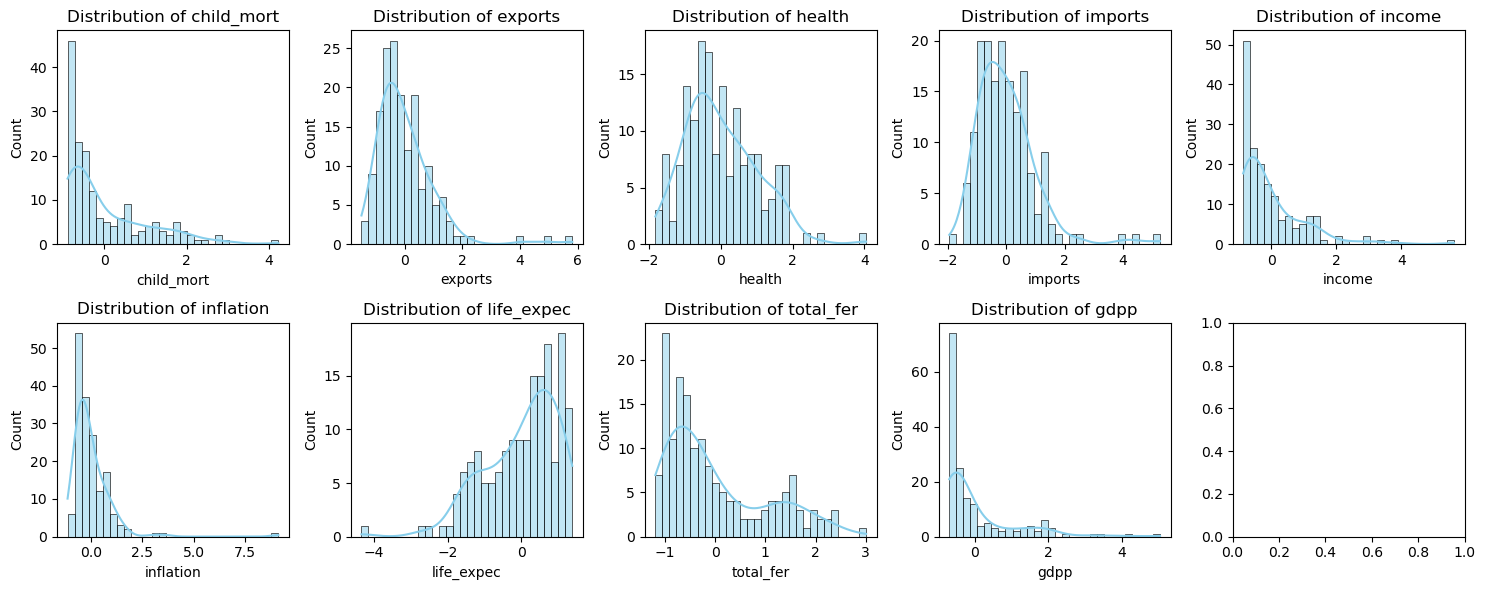

In [351]:
def plot_factors(data=df, factors=factors):
    n_factors = len(factors)
    rows = int(np.ceil(n_factors / 5))
    cols = min(n_factors, 5)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
    axes = axes.flatten()

    for i, attribute in enumerate(factors):
        sns.histplot(data[attribute], bins=30, kde=True, color='skyblue', ax=axes[i])
        axes[i].set_title(f'Distribution of {attribute}')

    plt.tight_layout()
    plt.show()

plot_factors()

<p>Проведемо двофакторний аналіз за допомогою матриці коваріацій та heatmap</p>

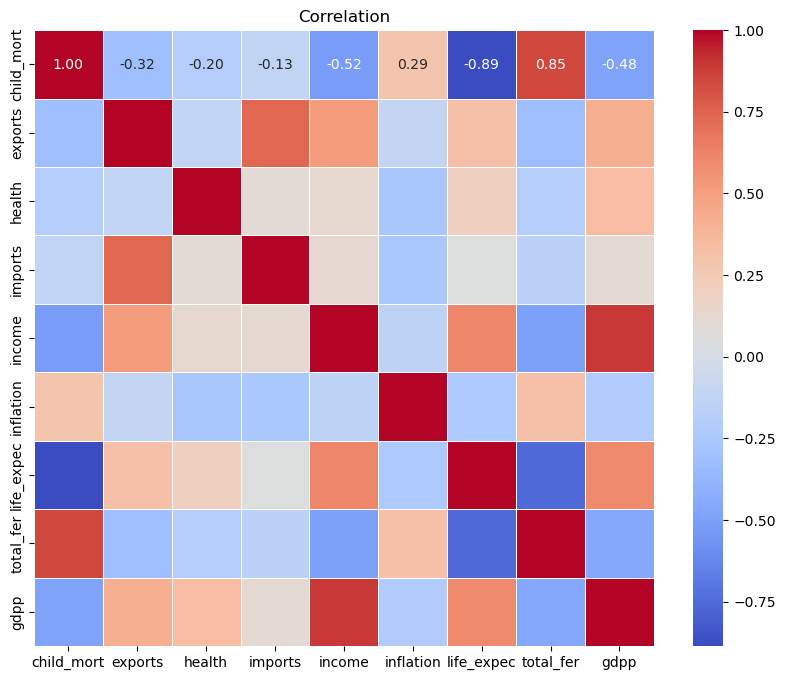

In [352]:
corr_matrix = df[factors].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidth=.5) 
plt.title('Correlation')
plt.show()

<p>Виділимо ключові фактори та проаналізуємо їх</p>

In [353]:
key_factors = ['child_mort', 'income', 'gdpp']

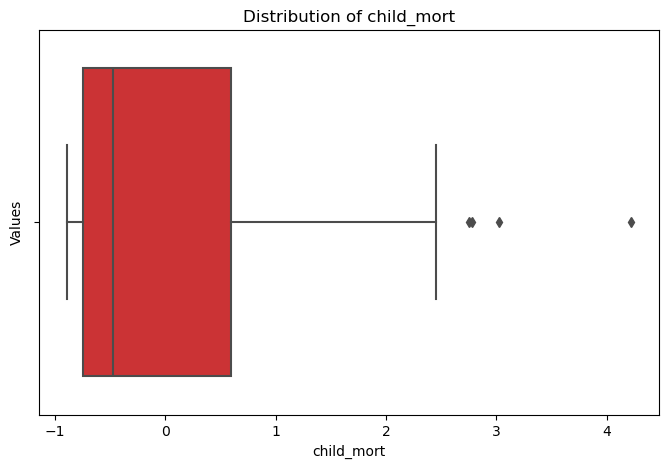

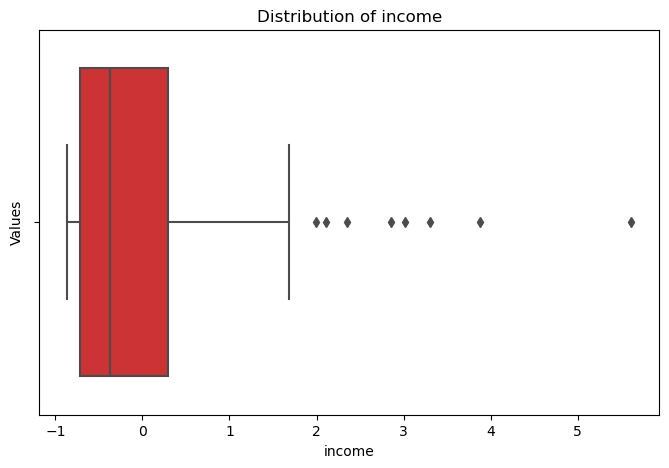

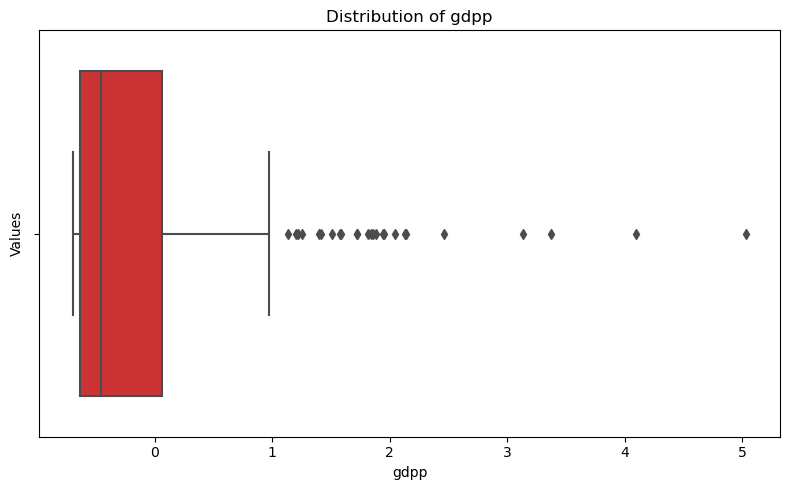

In [354]:
def box_plot_factors(factors):
    for factor in factors:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=factor, data=df, palette='Set1')
        plt.title(f'Distribution of {factor}')
        plt.xlabel(factor)
        plt.ylabel('Values')

    plt.tight_layout()
    plt.show()

box_plot_factors(key_factors)

<p>Видалимо викиди лише за межею 4-х стандартних відхилень від середнього так, як ці фактори є ключовими, а їх викиди знаходяться в одному діапазоні</p>
<p>Операцію можна повторювати для отримання ще більш обробленого результату</p>

4 outliers to change


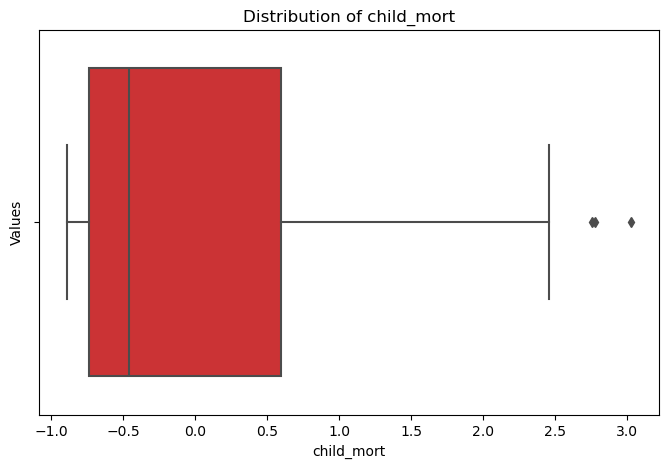

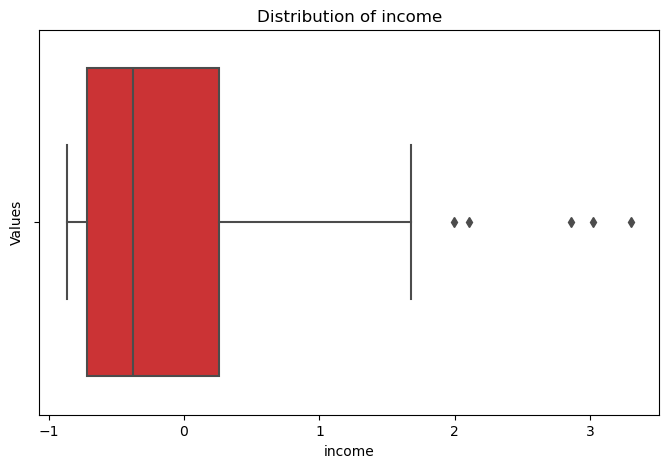

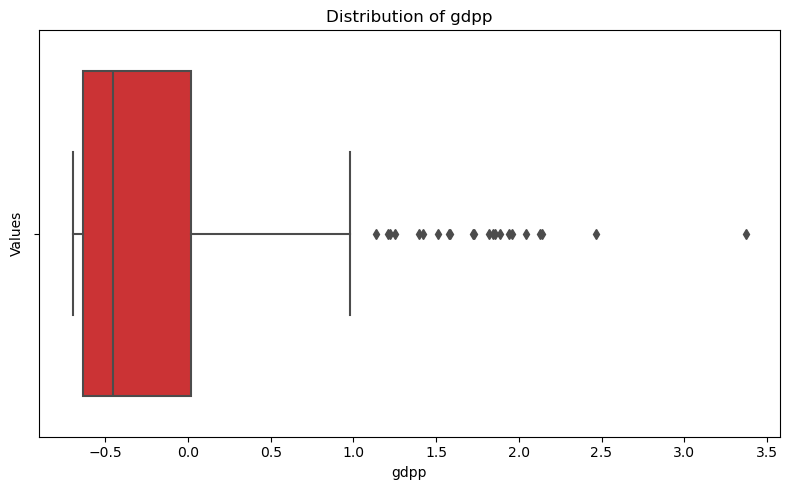

In [355]:
def get_outliers(factors, threshold=3):
    key_means = []
    std_devs = []
    outliers = []

    for factor in factors:
        key_means.append(df[factor].mean())
        std_devs.append(df[factor].std())

    for i, factor in enumerate(factors):
        outliers_indices = df[df[factor] - np.abs(key_means[i]) > threshold * std_devs[i]].index
        outliers.extend(outliers_indices)

    print(f'{len(outliers)} outliers to change')
    return outliers

df = df.drop(get_outliers(key_factors, threshold=4))
box_plot_factors(key_factors)

<p>Проведемо цю операцію з заміною для інших не ключових факторів розвитку. Для них використаємо перевірку на 3 стандартні відхилення</p>

7 outliers to change


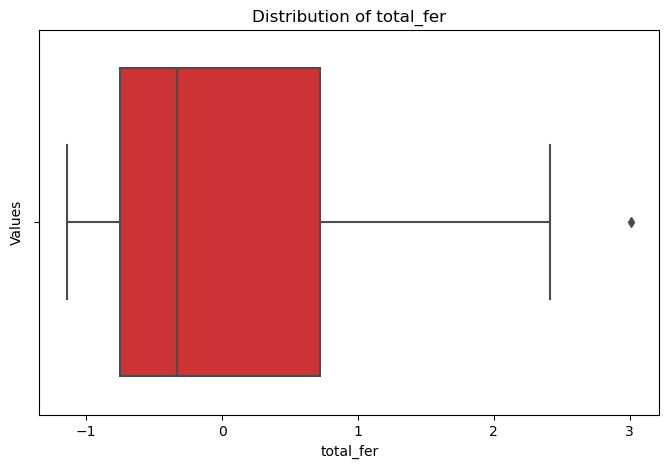

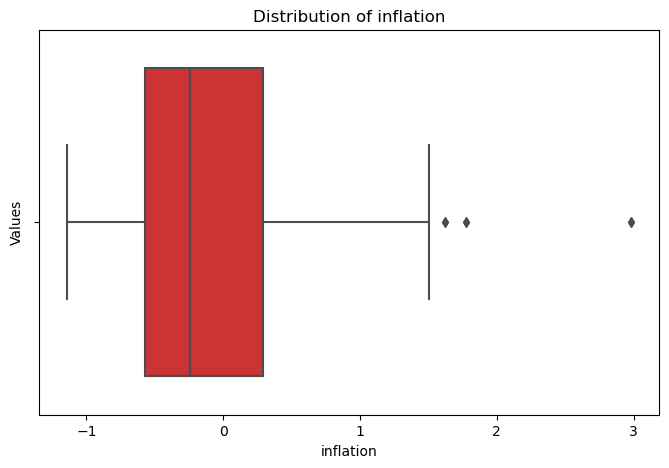

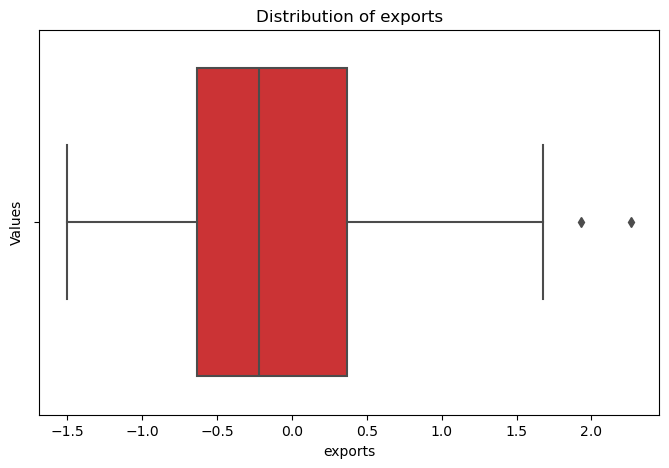

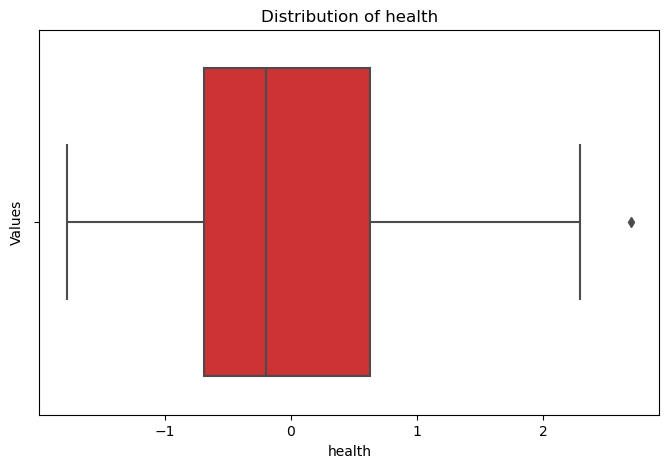

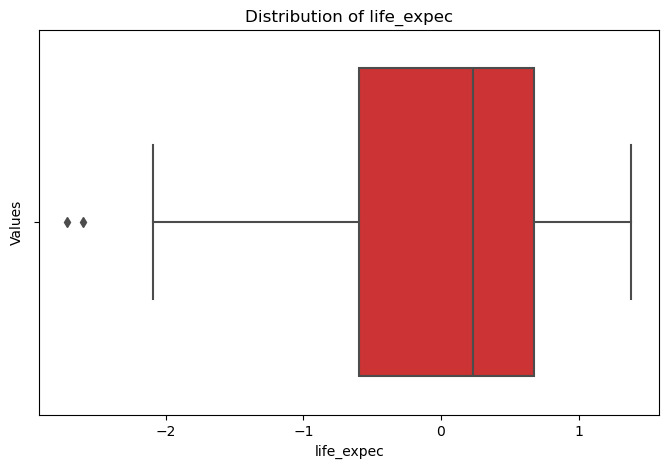

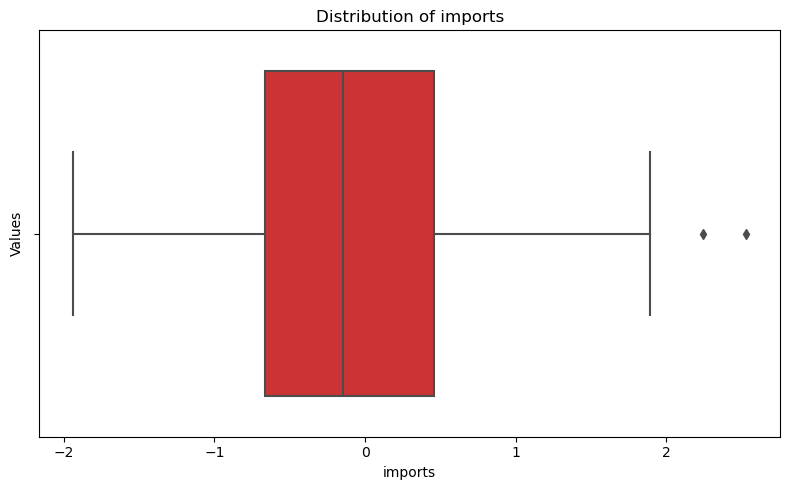

In [356]:
remained_factors = list(set(factors) - set(key_factors))
df = df.drop(get_outliers(remained_factors, threshold=3))
box_plot_factors(remained_factors)

<p>Проведемо кластеризацію даних використовуючи метод k-means</p>

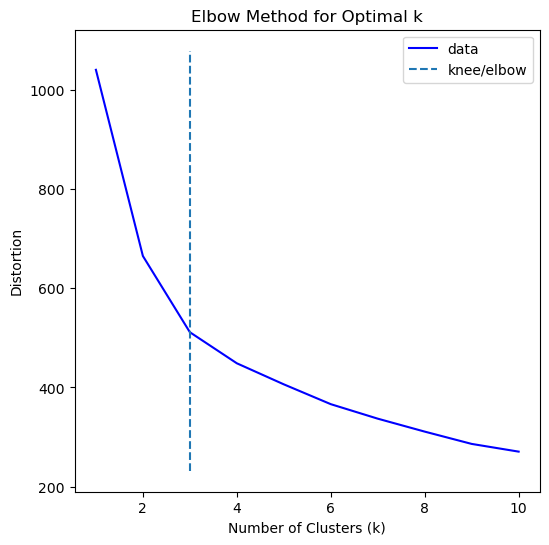

Optimal k: 3


In [357]:
def find_optimal_k(max_k=10):
    distortions = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df[factors])
        distortions.append(kmeans.inertia_)

    # finding optimal k with knee locator
    knee_locator = KneeLocator(range(1, max_k + 1), distortions, curve='convex', direction='decreasing')
    optimal_k = knee_locator.elbow

    # building knee graphics
    knee_locator.plot_knee()
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Distortion')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    return optimal_k

k = find_optimal_k()
print(f'Optimal k: {k}')

In [358]:
RND_STATE = 42
kmeans = KMeans(n_clusters=k, random_state=RND_STATE)
df['cluster'] = kmeans.fit_predict(df[factors])
df['cluster']

0      2
1      1
2      1
3      2
4      1
      ..
161    1
162    1
164    1
165    2
166    2
Name: cluster, Length: 158, dtype: int32

<p>Проведемо візуалізацію кластерів за парами ключових факторів</p>

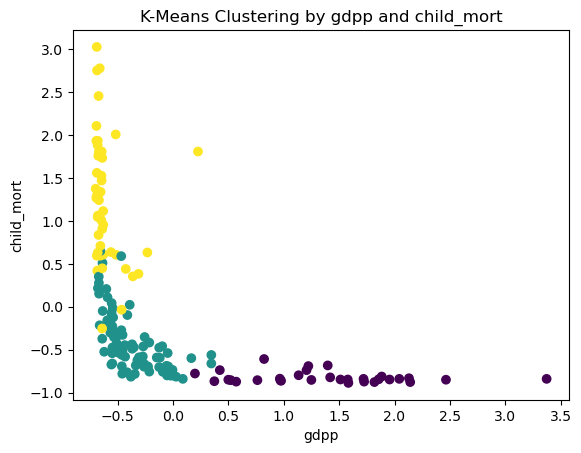

In [359]:
def visualize_cluster_by(factor1, factor2):
    plt.scatter(df[factor1], df[factor2], c=df['cluster'], cmap='viridis')
    plt.xlabel(factor1)
    plt.ylabel(factor2)
    plt.title(f'K-Means Clustering by {factor1} and {factor2}')
    plt.show()

visualize_cluster_by('gdpp', 'child_mort')

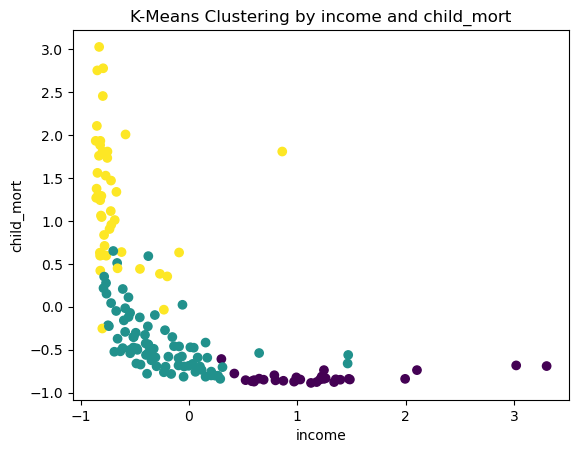

In [360]:
visualize_cluster_by('income', 'child_mort')

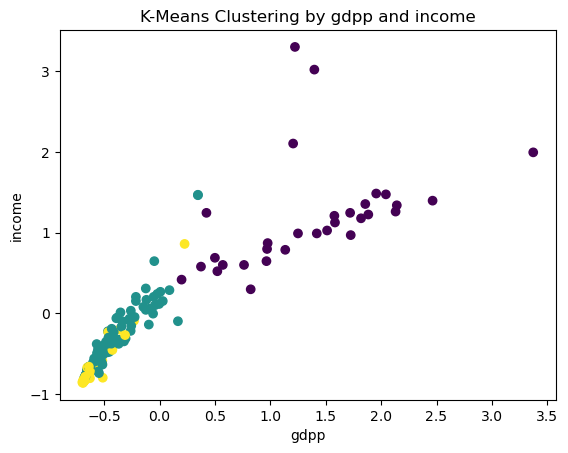

In [361]:
visualize_cluster_by('gdpp', 'income')

<h4>Summary</h4>
<p>Визначимо розподіл країн на кластери: бідні, у розвитку, розвинуті</p>

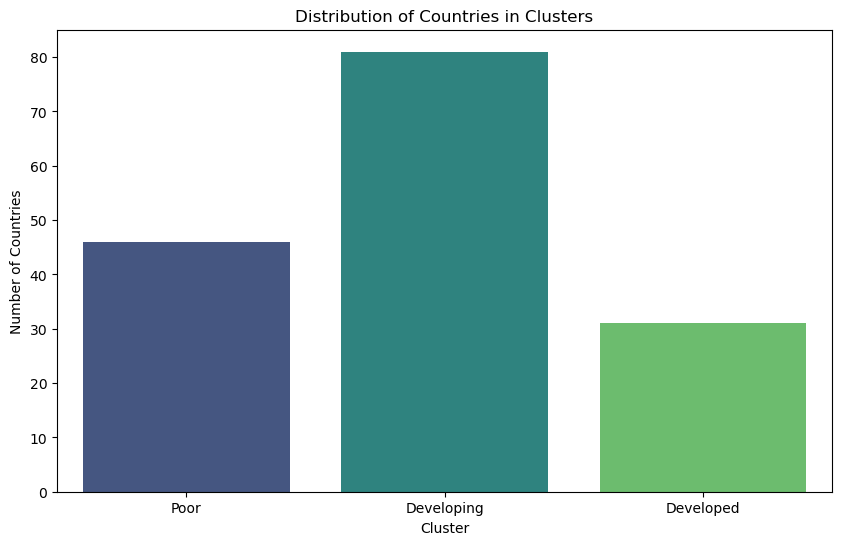

In [362]:
cluster_map = {0: 'Developed', 1: 'Developing', 2: 'Poor'}
df['cluster_desc'] = df['cluster'].replace(cluster_map)

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_desc', data=df, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Number of Countries')
plt.title('Distribution of Countries in Clusters')
plt.show()

<p>Проведемо візуалізацію країн цільвого кластеру(найбідніших). Для дейких графіків використаємо min-max нормалізацію для наочного зображення вартості пріорітетів фінансування</p>

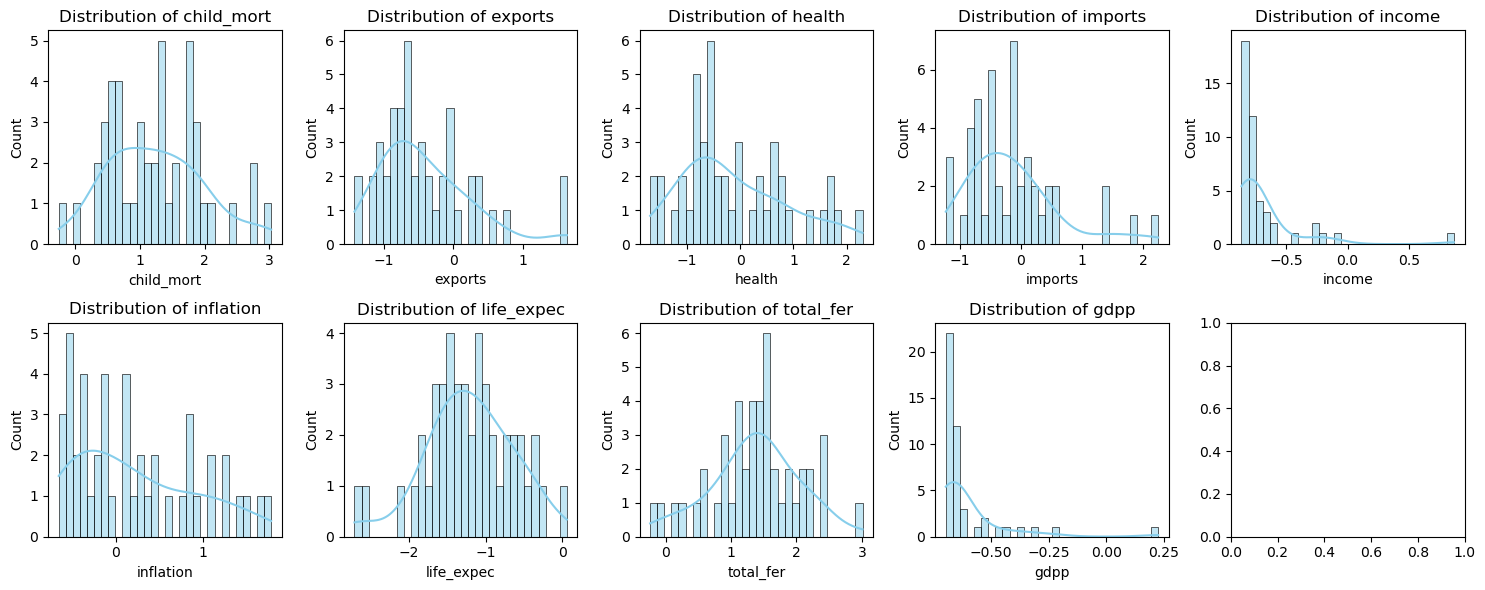

In [363]:
poor = df[df['cluster_desc'] == 'Poor']
plot_factors(data=poor)

<p>

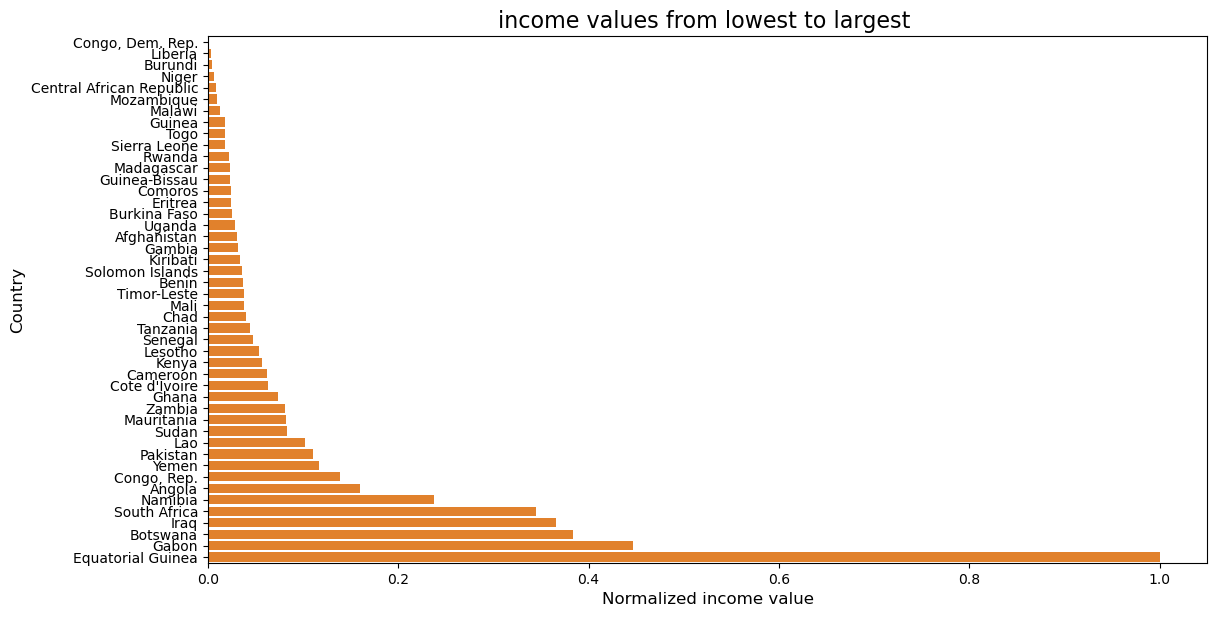

In [364]:
def growth_plot(factor, ascending_order=True):
    scaler = MinMaxScaler()
    poor[factor] = scaler.fit_transform(poor[[factor]])

    factor_data = poor[['country', factor]]
    factor_data = factor_data.sort_values(by = factor, ascending=ascending_order)

    make_plot(factor_data, factor)

def make_plot(data, factor):
    plt.figure(figsize=(12, 6))

    s = sns.barplot(x=factor, y='country', data=data, color='C1', orient='h')
    plt.xlabel(f'Normalized {factor} value', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.title(f'{factor} values from lowest to largest ', fontsize=16)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.tight_layout(pad=0.1)

    plt.show()

growth_plot('income')

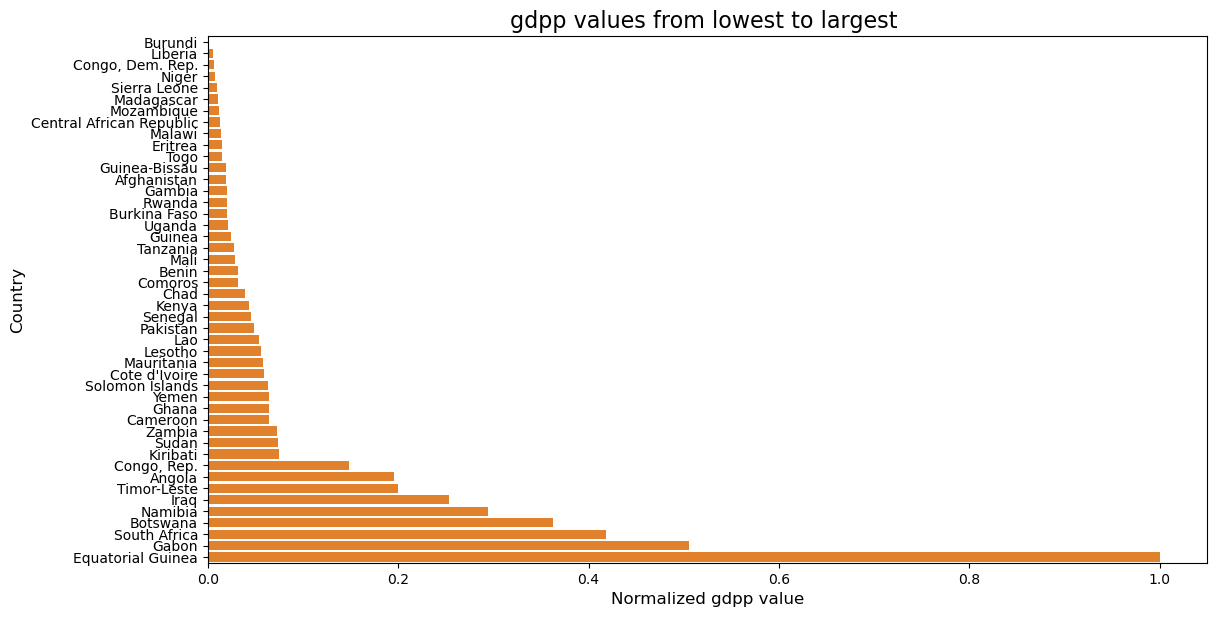

In [365]:
growth_plot('gdpp')

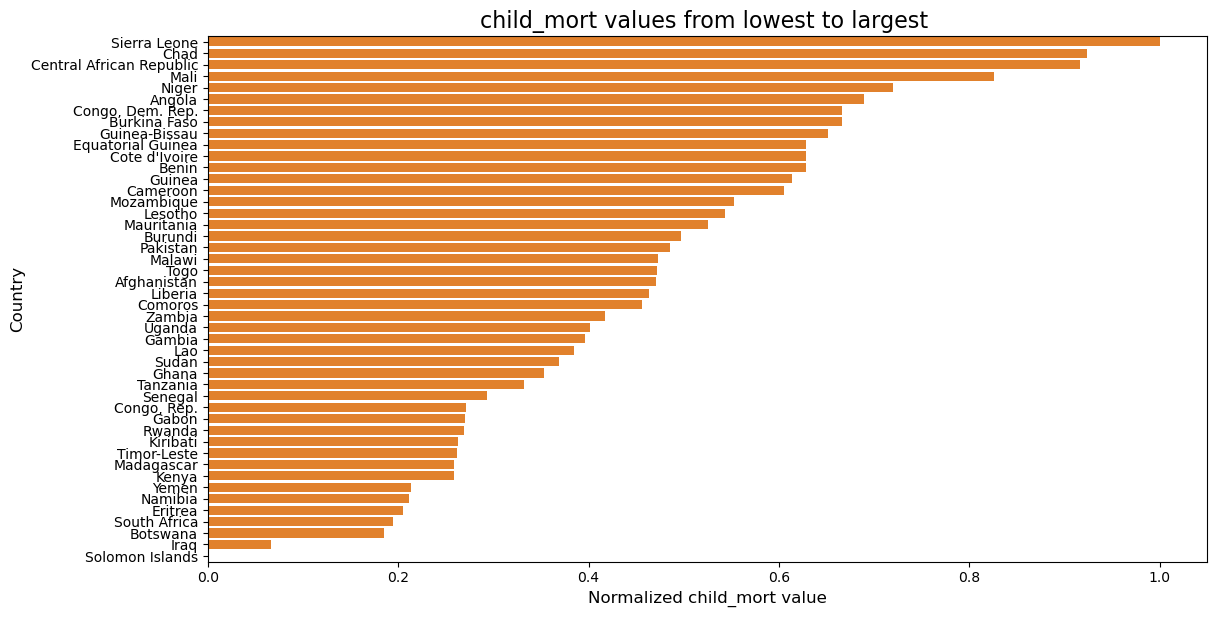

In [366]:
growth_plot('child_mort', ascending_order=False)

<p>Визначимо 5 країн з найгіршими показниками за факторами дитячої смертності, ВВП і доходу на особу</p>

In [372]:
bottom_5_income = poor.nsmallest(5, 'income')[['country', 'income']]
bottom_5_gdpp = poor.nsmallest(5, 'gdpp')[['country', 'gdpp']]
bottom_5_child_mort = poor.nlargest(5, 'child_mort')[['country', 'income']]

C = 'country'
bottom_5 = set(bottom_5_income[C]).intersection(bottom_5_gdpp[C], bottom_5_child_mort[C])
del C
bottom_5

{'Niger'}